In [11]:
import os
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.regression.mixed_linear_model import MixedLM
import seaborn as sns 
import matplotlib.pyplot as plt

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

os.makedirs('visualizations', exist_ok=True)

# Read processed CSV file
df = pd.read_csv("ms_data_new.csv")

# Drop outliers
df = df[(df['walking_speed'] >= 2) & (df['walking_speed'] <= 6.3)]

# Scatter plot of age vs walking speed with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='walking_speed', alpha=0.6, label="Data Points")
sns.regplot(data=df, x='age', y='walking_speed', scatter=False, color='red', label="Regression Line")
plt.title('Scatter Plot of Age vs Walking Speed', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Walking Speed (m/s)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig("visualizations/scatter_age_vs_walking_speed.png")
plt.close()

# Box plot of walking speed by education level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='education_level', y='walking_speed', palette='coolwarm')
plt.title('Box Plot of Walking Speed by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Walking Speed (m/s)', fontsize=14)
plt.tight_layout()
plt.savefig("visualizations/boxplot_walking_speed_education_level.png")
plt.close()

# Line plot showing education-age interaction
# Fit a model to get predicted values
interaction_model = smf.ols("walking_speed ~ education_level * age", data=df).fit()
df['predicted_walking_speed'] = interaction_model.predict(df)

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='age', y='predicted_walking_speed', hue='education_level', palette='tab10')
plt.title('Interaction Plot: Education Level and Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Predicted Walking Speed (m/s)', fontsize=14)
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("visualizations/lineplot_education_age_interaction.png")
plt.close()


/var/folders/63/klpq6sss15lb697997qxym8m0000gn/T/ipykernel_16611/931131093.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



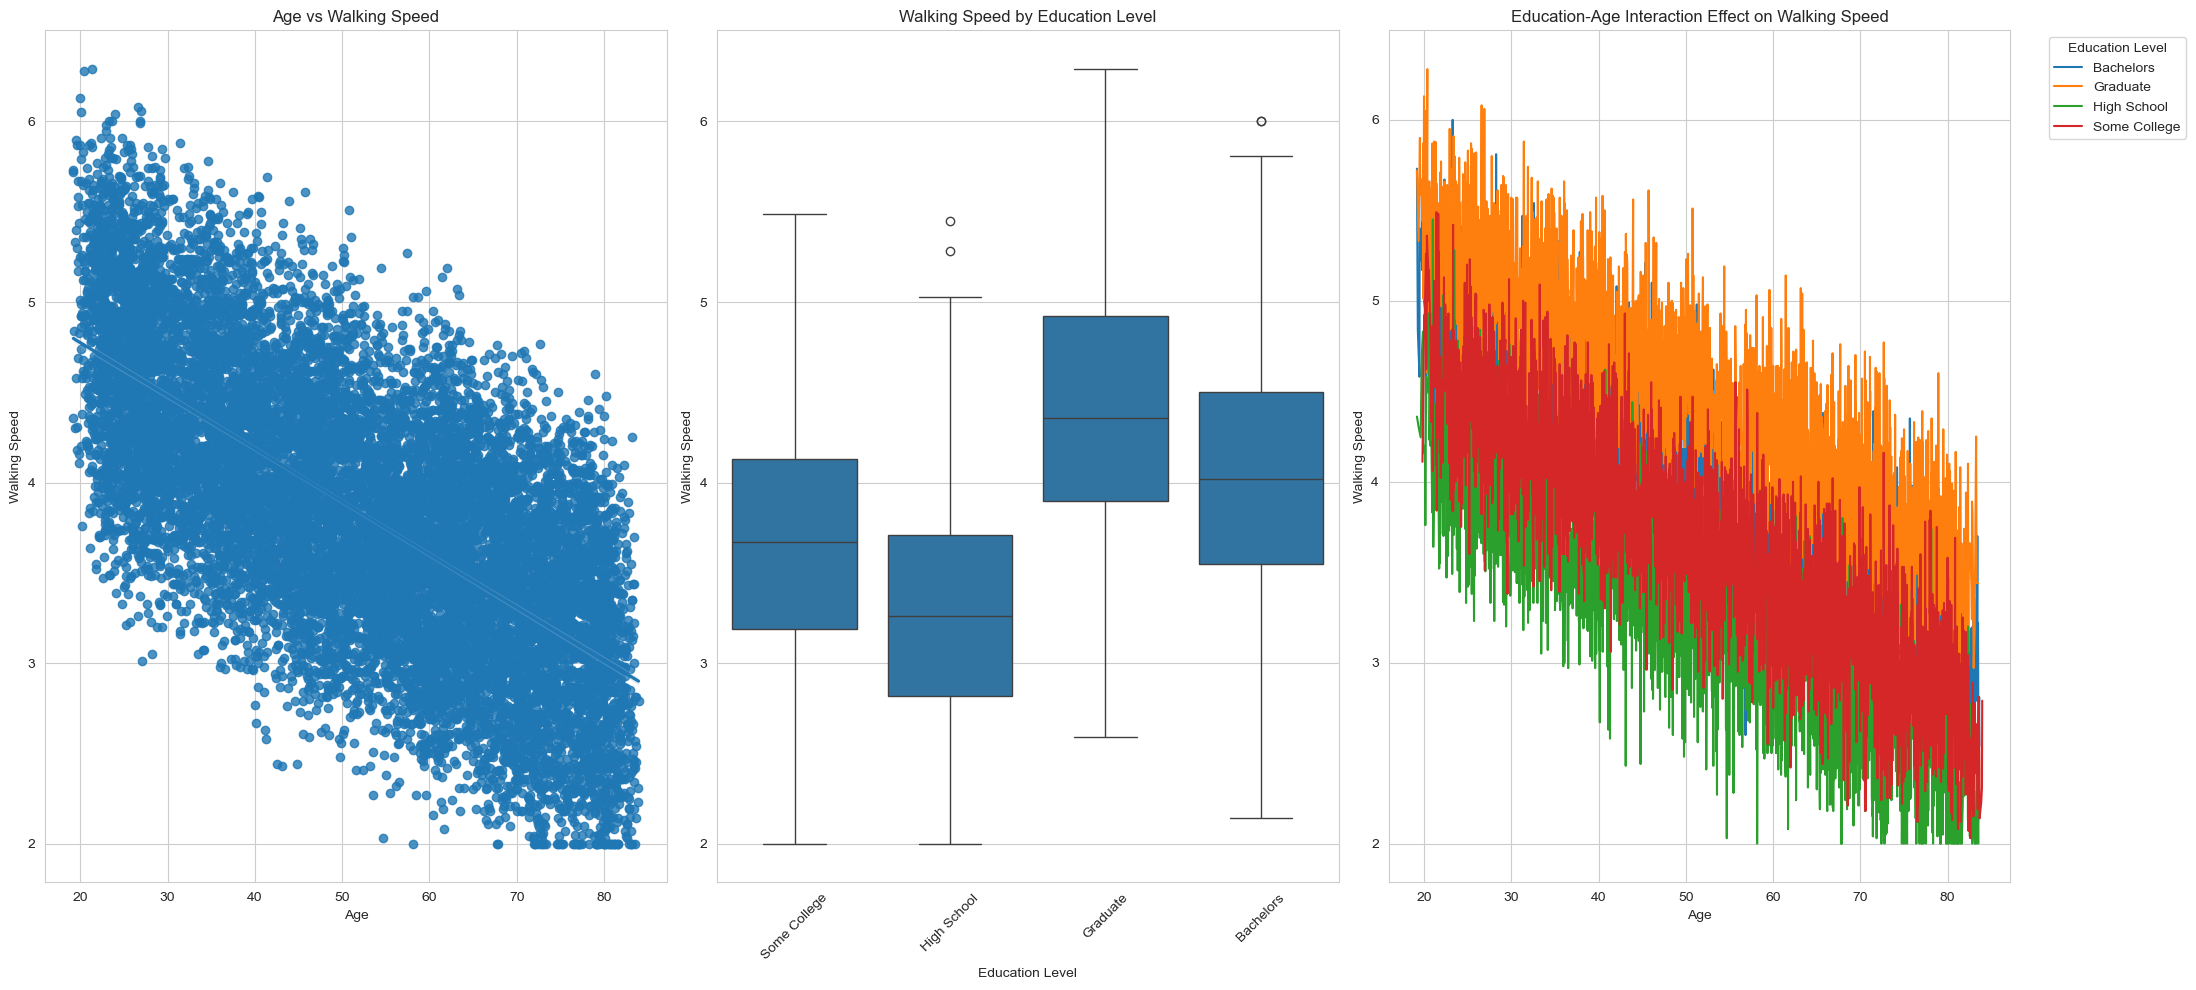

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

# Load and filter data
df = pd.read_csv("ms_data_new.csv")
df = df[(df['walking_speed'] >= 2) & (df['walking_speed'] <= 6.3)]

# Set style and create figure
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(22, 10))

# Create plots
sns.regplot(data=df, x='age', y='walking_speed', ax=axes[0])
axes[0].set(title='Age vs Walking Speed', xlabel='Age', ylabel='Walking Speed')

sns.boxplot(data=df, x='education_level', y='walking_speed', ax=axes[1])
axes[1].set(title='Walking Speed by Education Level', xlabel='Education Level', ylabel='Walking Speed')
axes[1].tick_params(axis='x', rotation=45)

grouped = df.groupby(['education_level', 'age'])['walking_speed'].mean().reset_index()
sns.lineplot(data=grouped, x='age', y='walking_speed', hue='education_level', ax=axes[2])
axes[2].set(title='Education-Age Interaction Effect on Walking Speed', xlabel='Age', ylabel='Walking Speed')
axes[2].legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add zoom functionality
def zoom(event):
    for ax in axes:
        ax.set_autoscale_on(True)
        if event.button == 'up':
            ax.set_xlim(ax.get_xlim()[0] * 0.9, ax.get_xlim()[1] * 0.9)
            ax.set_ylim(ax.get_ylim()[0] * 0.9, ax.get_ylim()[1] * 0.9)
        else:
            ax.set_xlim(ax.get_xlim()[0] * 1.1, ax.get_xlim()[1] * 1.1)
            ax.set_ylim(ax.get_ylim()[0] * 1.1, ax.get_ylim()[1] * 1.1)
    plt.draw()

# Connect zoom function to scroll event
fig.canvas.mpl_connect('scroll_event', zoom)

# Adjust layout and save
plt.tight_layout()
plt.savefig('visualizations/walking_speed_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/63/klpq6sss15lb697997qxym8m0000gn/T/ipykernel_16611/513360763.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



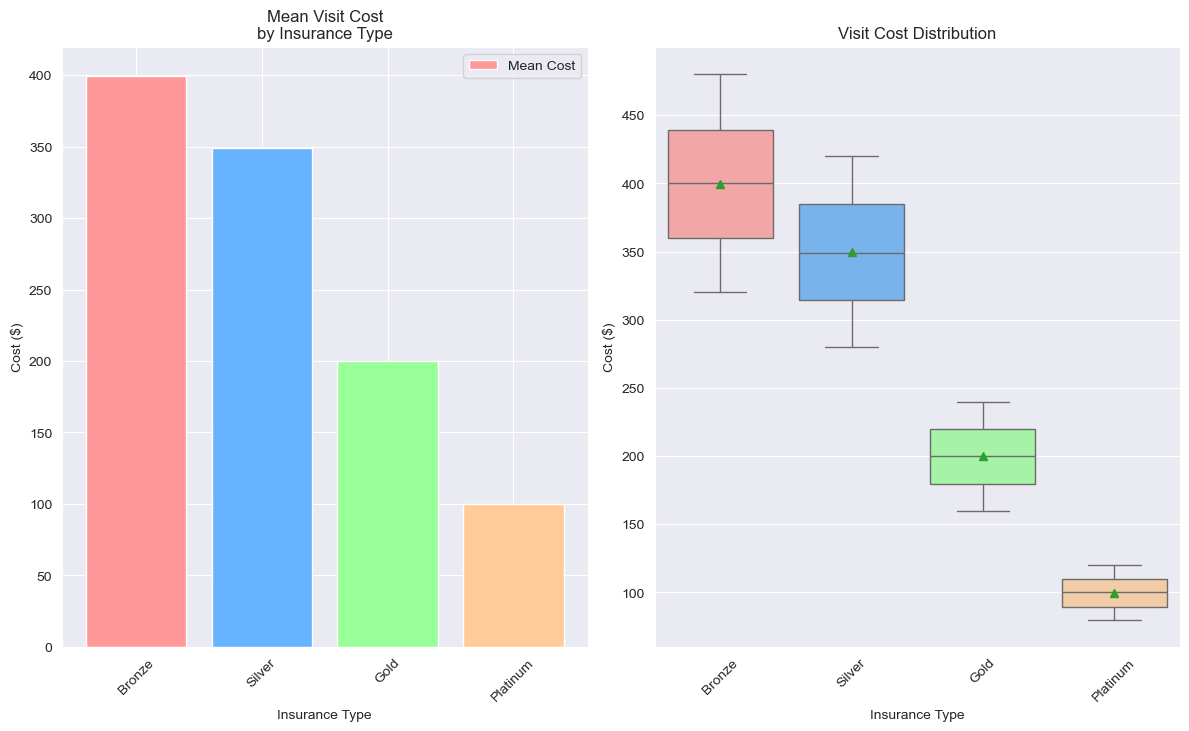

In [156]:
import seaborn as sns
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
df = pd.read_csv("ms_data_new.csv")
df = df[(df['walking_speed'] >= 2) & (df['walking_speed'] <= 6.3)]
sns.set_style("darkgrid")
custom_palette = {
    'Bronze': '#ff9999',
    'Silver': '#66b3ff',
    'Gold': '#99ff99',
    'Platinum': '#ffcc99'
}
insurance_order = ['Bronze', 'Silver', 'Gold', 'Platinum']
fig_width = 12
fig_height = fig_width / 1.618
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(fig_width, fig_height))

# Reorder mean_costs to match insurance_order
mean_costs = df.groupby('insurance_type')['visit_cost'].mean().reindex(insurance_order)
t_values = stats.t.ppf(0.975, df=len(df) - 1)
confidence_intervals = t_values * df.groupby('insurance_type')['visit_cost'].sem()

# Bar plot with ordered categories
bars = ax1.bar(range(len(insurance_order)), mean_costs, 
               color=[custom_palette[i] for i in insurance_order], 
               label="Mean Cost")
ax1.set_title('Mean Visit Cost\nby Insurance Type')
ax1.set_xlabel('Insurance Type')
ax1.set_ylabel('Cost ($)')
ax1.set_xticks(range(len(insurance_order)))
ax1.set_xticklabels(insurance_order, rotation=45)
ax1.legend()

# Boxplot with ordered categories
sns.boxplot(data=df, x='insurance_type', y='visit_cost', 
            order=insurance_order,
            palette=[custom_palette[i] for i in insurance_order], 
            ax=ax2, 
            showmeans=True)
ax2.set_title('Visit Cost Distribution')
ax2.set_xlabel('Insurance Type')
ax2.set_ylabel('Cost ($)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('visualizations/cost_analysis_plots.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()


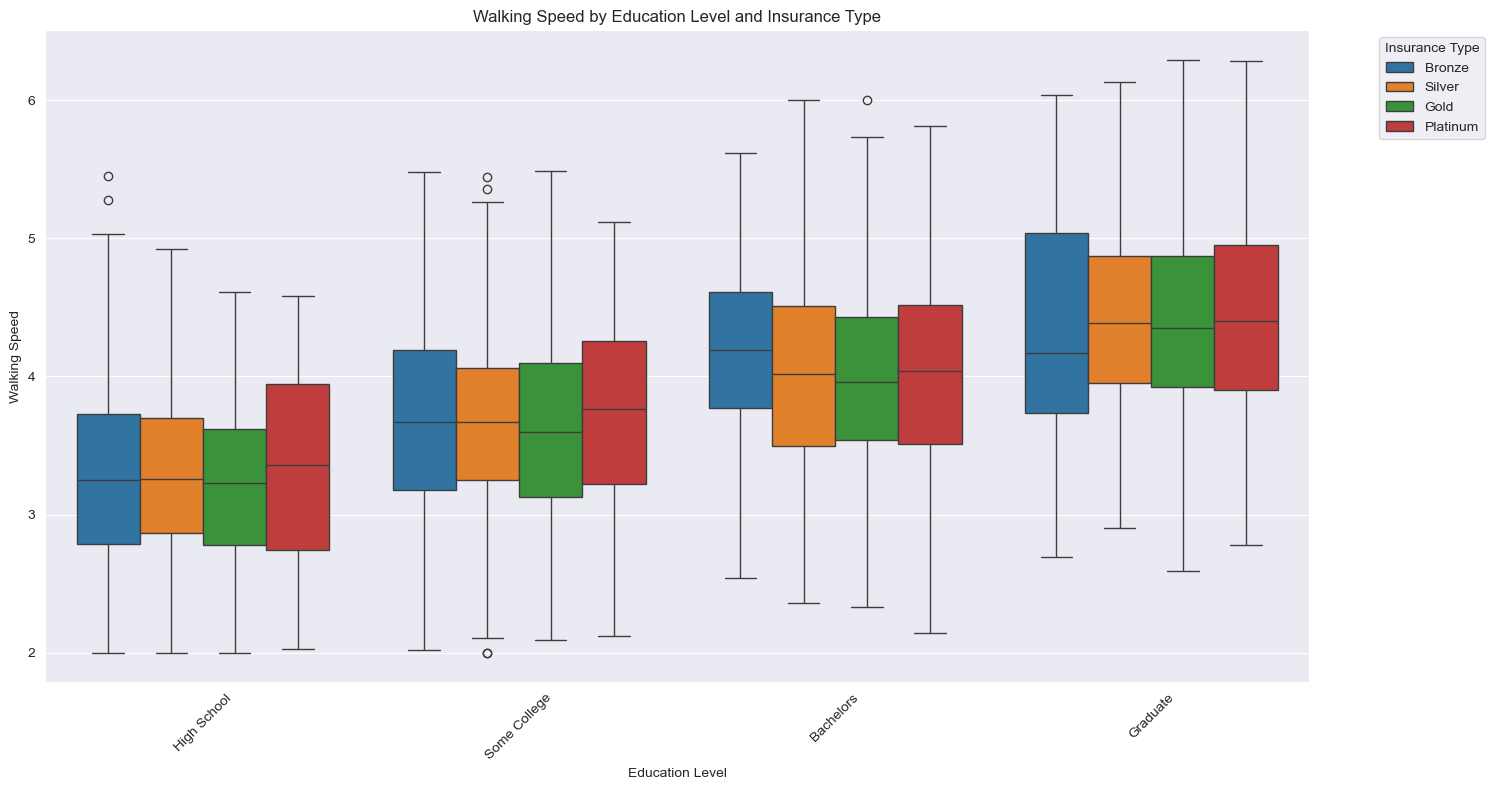

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define orders
insurance_order = ['Bronze', 'Silver', 'Gold', 'Platinum']
education_order = ['High School', 'Some College', 'Bachelors', "Graduate"]

# Create figure
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

# Create ordered boxplot
sns.boxplot(data=df, x='education_level', y='walking_speed', hue='insurance_type', 
            order=education_order, hue_order=insurance_order, ax=ax)

def zoom(event):
    current_ylim = ax.get_ylim()
    if event.button == 'up':
        ax.set_ylim(current_ylim[0] * 0.9, current_ylim[1] * 0.9)
    elif event.button == 'down':
        ax.set_ylim(current_ylim[0] * 1.5, current_ylim[1] * 1.5)
    plt.draw()

fig.canvas.mpl_connect('scroll_event', zoom)

plt.title('Walking Speed by Education Level and Insurance Type')
plt.xlabel('Education Level')
plt.ylabel('Walking Speed')
plt.xticks(rotation=45)
plt.legend(title='Insurance Type', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.savefig('visualizations/walking_speed_pairwise.png', dpi=300, bbox_inches='tight')
plt.show()

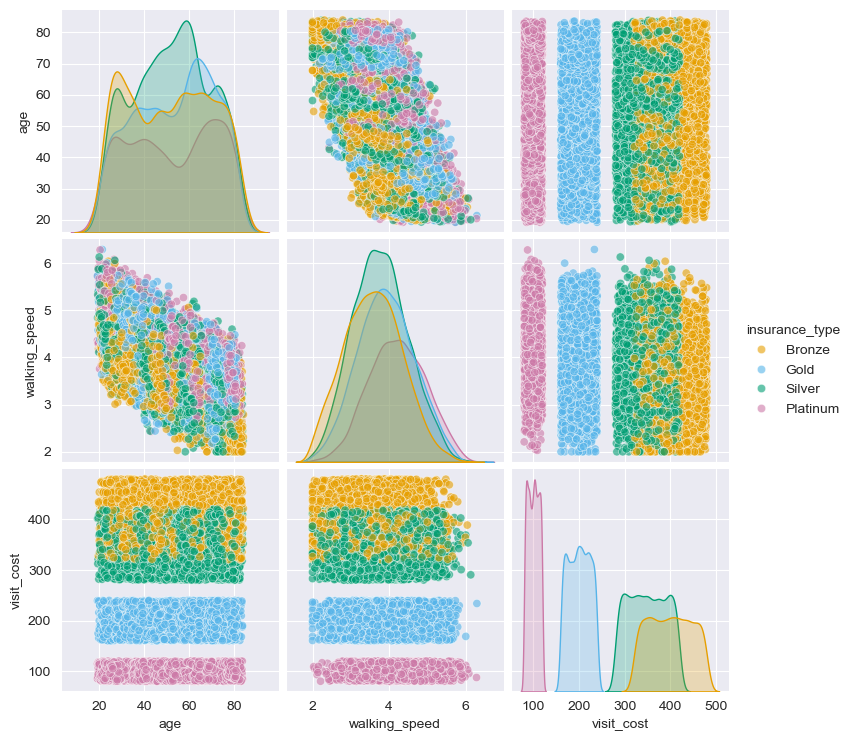

In [158]:
g = sns.pairplot(
    data=df,
    hue="insurance_type", 
    hue_order=None,
    palette=['#E69F00', '#56B4E9', '#009E73', '#CC79A7'],
    vars=None,
    x_vars=None, 
    y_vars=None,
    kind='scatter',
    diag_kind='kde',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=True,
    plot_kws={'alpha': 0.6},
    diag_kws=None,
    grid_kws=None
)


# Save and show
plt.savefig("visualizations/pairplot_key_variables.png", dpi=300, bbox_inches="tight")
plt.show()


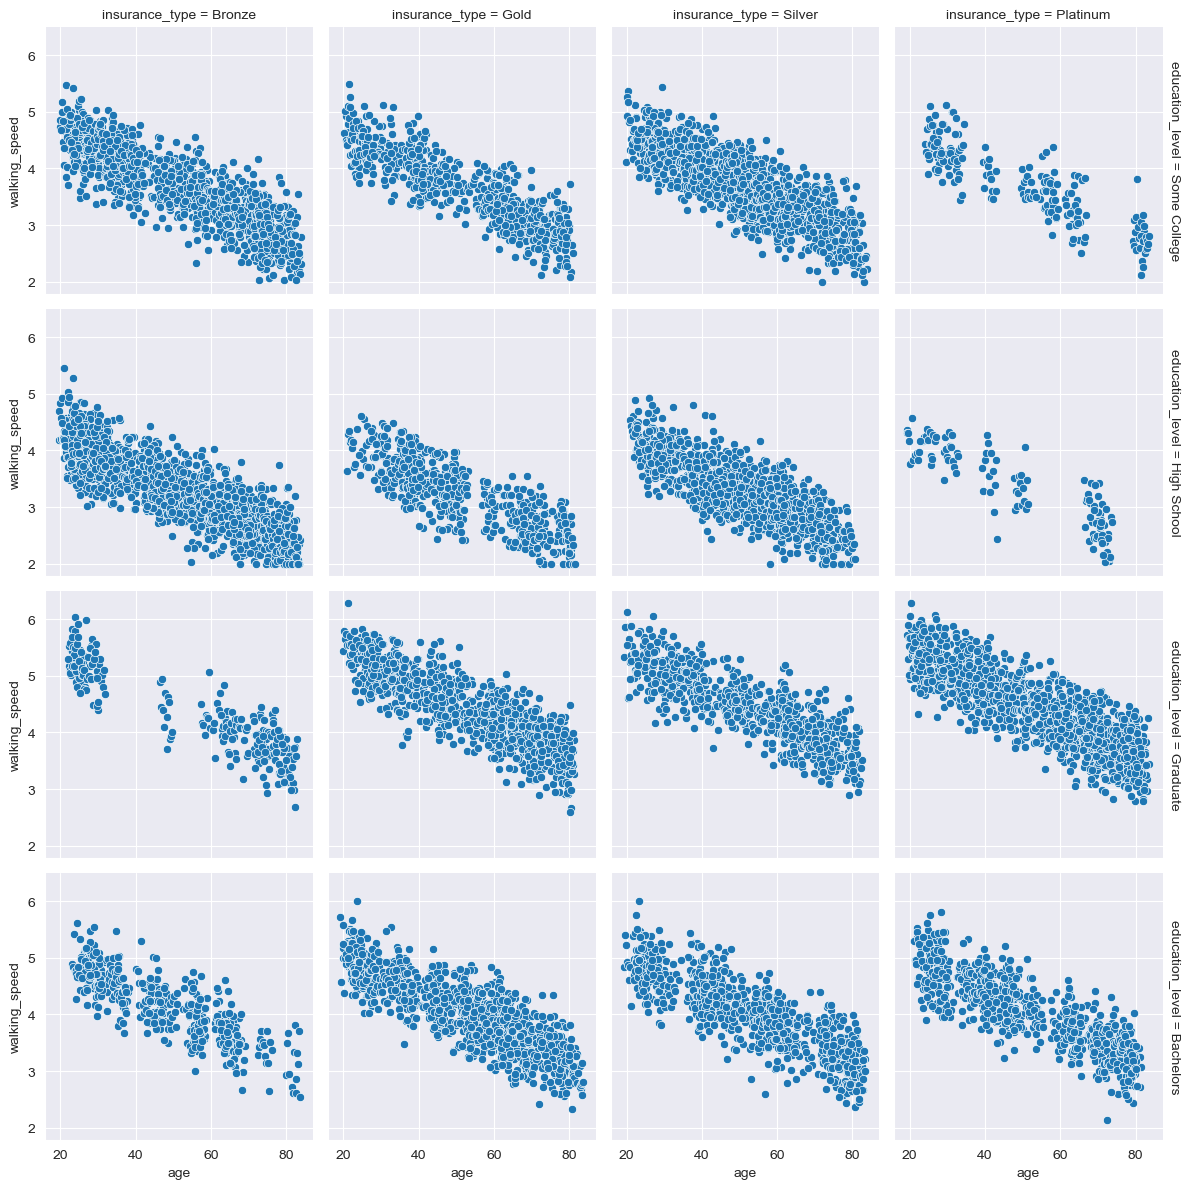

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load and filter the data
df = pd.read_csv("ms_data_new.csv")
df = df[(df['walking_speed'] >= 2) & (df['walking_speed'] <= 6.3)]

# Create faceted scatter plots
g = sns.FacetGrid(df, row="education_level", col="insurance_type", margin_titles=True)
g.map(sns.scatterplot, "age", "walking_speed")

# Save and show
plt.savefig("visualizations/faceted_plots_edu_ins.png", dpi=300, bbox_inches="tight")
plt.show()